In [46]:
import os

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer as Vectorizer

from cross_validation import *

BOW_FILE = "bow_columns_list_problem2.txt"
REGRESSION_PKL_FILE = "regression_mdl_problem2.pkl"
WEBSITE_MAPPING = {'imdb': 0, 'amazon': 1, 'yelp': 2}
RANDOM_STATE = 132
NUM_FOLDS = 6

N_JOBS = -1

def make_bag_of_words(text_series, ngram_range=(1, 1), max_features=1000, binary=True):
    vectorizer = Vectorizer(ngram_range=ngram_range, max_features=max_features, stop_words='english', binary=binary)
    bow_matrix = vectorizer.fit_transform(text_series)
    bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

def find_min_tuple(tuples, place=1):
    min_tuple = ()
    min = 1000000
    for tup in tuples:
        if tup[place] < min:
            min = tup[place]
            min_tuple = tup
    return min_tuple

In [47]:
def test_n_estimators(x_train_array, y_train_array, range_list, warm_start=False):
    tuples = []
    for n_estimators in range_list:
        model = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1, warm_start=warm_start)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (n_estimators, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)


    return tuples
    

def test_max_depth(x_train_array, y_train_array, range_list):
    tuples = []
    for max_depth in range_list:
        model = sklearn.ensemble.RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (max_depth, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples


def test_min_samples_split(x_train_array, y_train_array, range_list):
    tuples = []
    for min_samples_split in range_list:
        model = sklearn.ensemble.RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (min_samples_split, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples


def test_min_samples_leaf(x_train_array, y_train_array, range_list):
    tuples = []
    for min_samples_leaf in range_list:
        model = sklearn.ensemble.RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (min_samples_leaf, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples

def test_max_samples(x_train_array, y_train_array, range_list):
    tuples = []
    for max_samples in range_list:
        model = sklearn.ensemble.RandomForestClassifier(max_samples=max_samples, n_jobs=-1)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (max_samples, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples

def test_ccp_alpha(x_train_array, y_train_array, range_list):
    tuples = []
    for ccp_alpha in range_list:
        model = sklearn.ensemble.RandomForestClassifier(ccp_alpha=ccp_alpha, n_jobs=-1)
        train_err_per_fold, test_error_per_fold = train_models_and_calc_scores_for_n_fold_cv(model, x_train_array, y_train_array.ravel(), n_folds=NUM_FOLDS, random_state=RANDOM_STATE)
        avg_test_error = np.average(test_error_per_fold)
        avg_train_error = np.average(train_err_per_fold)

        new_tuple = (ccp_alpha, avg_test_error, avg_train_error)
        tuples.append(new_tuple)
        print(new_tuple)

        
    return tuples

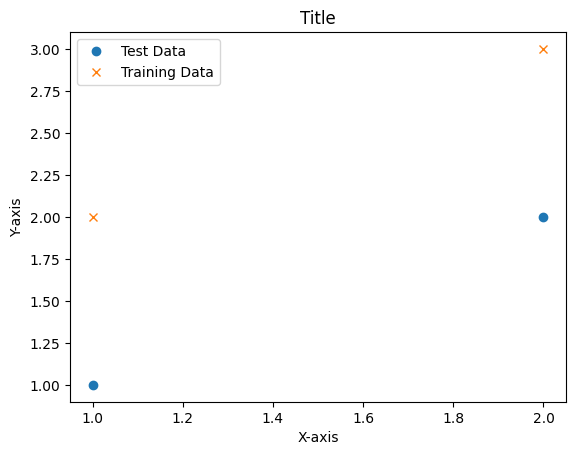

In [48]:
def plot_graph(tuples, xaxis='X-axis', yaxis='Y-axis', title='Title'):
    xs = []
    y1s = []
    y2s = []
    for tup in tuples:
        x, y1, y2 = tup
        xs.append(x)
        y1s.append(y1)
        y2s.append(y2)
    plt.plot(xs, y1s, label='Test Data', marker='o', linestyle='')
    plt.plot(xs, y2s, label='Training Data', marker='x', linestyle='')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    plt.legend()
    plt.show()

plot_graph([(1,1,2), (2,2,3)])


In [49]:
data_dir = "./data_reviews/"
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))
text = x_train_df['text']

# choose bow
bow_max_features = 1000
bow = make_bag_of_words(x_train_df['text'], max_features=bow_max_features)
# export as list
# with open(BOW_FILE, 'w') as file:
#     for column in bow.columns:
#         file.write(column + '\n')
# make final training data
x_train_df = pd.concat([x_train_df, bow], axis=1).drop(columns=['text', 'website_name'], axis=1)
# x_train_df['website_name'].replace(website_mapping, inplace=True)
x_train_array = x_train_df.to_numpy()
y_train_array = y_train_df.to_numpy()

In [50]:
## RANGES
n_estimators_range = range(10, 500, 10)
max_depth_range = range(100, 500, 10)
min_samples_split_range = range(1, 11, 1)
min_samples_leaf_range = range(1, 11, 1)
max_samples_range = range(1, 1000, 10)
ccp_alpha_range = range(1, 600, 10)

(1e-05, 0.22458334, 0.015416667)
(0.00011, 0.22083335, 0.017416669)
(0.00021, 0.21958333, 0.024666667)
(0.00031, 0.21416666, 0.036333337)
(0.00041, 0.21416669, 0.051)
(0.00051, 0.21750002, 0.06666667)
(0.00061, 0.21750002, 0.08141667)
(0.00071, 0.21750002, 0.09358334)
(0.00081, 0.21833332, 0.10658335)
(0.00091, 0.22166668, 0.118833326)
(0.00101, 0.21583332, 0.12583333)
(0.00111, 0.21541667, 0.13308334)
(0.00121, 0.22041668, 0.13875)
(0.00131, 0.22666667, 0.146)
(0.00141, 0.22333334, 0.15275)
(0.00151, 0.22875, 0.15758334)
(0.00161, 0.23291665, 0.164)
(0.00171, 0.2325, 0.16566665)
(0.00181, 0.22958332, 0.1735)
(0.00191, 0.23333333, 0.17666666)
(0.00201, 0.23208332, 0.18316667)
(0.00211, 0.23416667, 0.18708335)
(0.00221, 0.23833333, 0.19466667)
(0.00231, 0.24249999, 0.19425)
(0.00241, 0.24291666, 0.19858335)
(0.00251, 0.24333332, 0.20341669)
(0.00261, 0.24416666, 0.20249999)
(0.00271, 0.24333334, 0.20525001)
(0.00281, 0.24916667, 0.20991667)
(0.00291, 0.2516667, 0.214)
(0.00301, 0.25375,

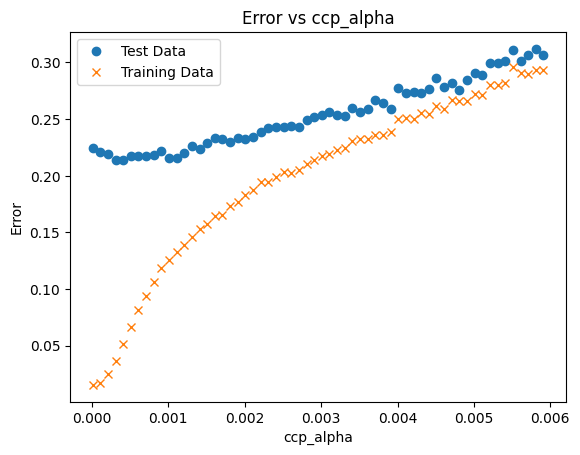

In [51]:
ccp_alpha_range = [float(x) / 100000 for x in ccp_alpha_range]
tuples = test_ccp_alpha(x_train_array, y_train_array, ccp_alpha_range)
plot_graph(tuples, yaxis='Error', xaxis='ccp_alpha', title='Error vs ccp_alpha')

(1, 0.48749998, 0.5025)
(11, 0.37375, 0.35308334)
(21, 0.35000002, 0.33316663)
(31, 0.33958337, 0.29783332)
(41, 0.33708334, 0.29933333)
(51, 0.32000002, 0.29366666)
(61, 0.31208333, 0.25883335)
(71, 0.30458334, 0.23799999)
(81, 0.29708332, 0.25425)
(91, 0.29125002, 0.24108334)
(101, 0.2854167, 0.22458333)
(111, 0.27791667, 0.22641666)
(121, 0.28041664, 0.20724998)
(131, 0.26583335, 0.20133333)
(141, 0.2616667, 0.18633334)
(151, 0.27583334, 0.20099999)
(161, 0.25875, 0.18775)
(171, 0.25083333, 0.17150001)
(181, 0.25458333, 0.17266667)
(191, 0.24583334, 0.17666666)
(201, 0.24708335, 0.16724999)
(211, 0.25083333, 0.16733335)
(221, 0.2475, 0.16083331)
(231, 0.25166667, 0.151)
(241, 0.24375002, 0.15249999)
(251, 0.23916666, 0.14266667)
(261, 0.24083333, 0.14725)
(271, 0.23625, 0.14674999)
(281, 0.23708333, 0.13858335)
(291, 0.23583333, 0.14158334)
(301, 0.22833334, 0.13683333)
(311, 0.23208334, 0.128)
(321, 0.23875, 0.12825)
(331, 0.23083334, 0.12583333)
(341, 0.2375, 0.12658334)
(351, 0.2

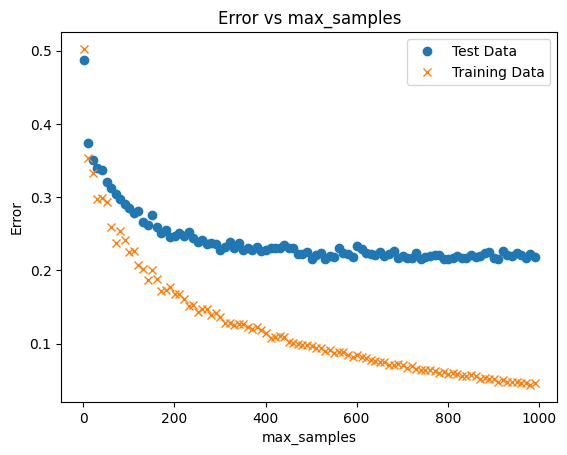

In [52]:
tuples = test_max_samples(x_train_array, y_train_array, max_samples_range)
plot_graph(tuples, yaxis='Error', xaxis='max_samples', title='Error vs max_samples')

(10, 0.059583336, 0.059583332)
(20, 0.057083327, 0.057083335)
(30, 0.050416667, 0.050416667)
(40, 0.047916662, 0.047916666)
(50, 0.04708333, 0.047083333)
(60, 0.04833333, 0.048333332)
(70, 0.048749994, 0.048750002)
(80, 0.049999993, 0.05)
(90, 0.04833333, 0.048333332)
(100, 0.047499996, 0.0475)
(110, 0.04833333, 0.048333332)
(120, 0.049999993, 0.05)
(130, 0.048749994, 0.04875)
(140, 0.049999993, 0.05)
(150, 0.047916662, 0.047916666)
(160, 0.048749994, 0.04875)
(170, 0.047499996, 0.0475)
(180, 0.04708333, 0.047083333)
(190, 0.047916662, 0.047916666)
(200, 0.04708333, 0.047083333)
(210, 0.049999993, 0.05)
(220, 0.048749994, 0.04875)
(230, 0.04708333, 0.047083333)
(240, 0.047916662, 0.047916666)
(250, 0.047916662, 0.047916666)
(260, 0.04916666, 0.049166664)
(270, 0.048749994, 0.04875)
(280, 0.047499996, 0.0475)
(290, 0.04708333, 0.047083333)
(300, 0.047916662, 0.047916666)
(310, 0.049999993, 0.05)
(320, 0.04833333, 0.048333332)
(330, 0.047916662, 0.047916666)
(340, 0.048749994, 0.04875000

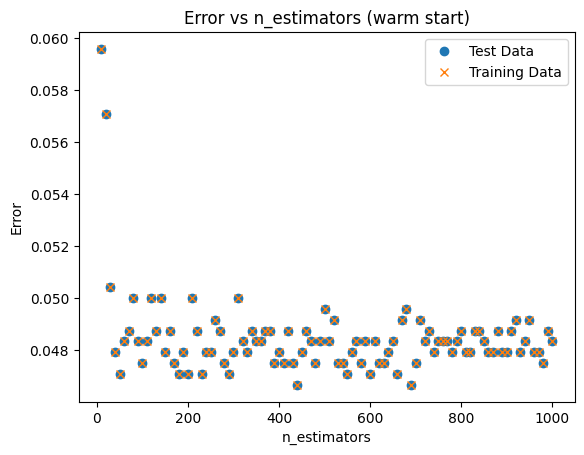

In [53]:
n_estimators_range = range(10, 1001, 10)
tuples = test_n_estimators(x_train_array, y_train_array, n_estimators_range, warm_start=True)
plot_graph(tuples, yaxis='Error', xaxis='n_estimators', title='Error vs n_estimators (warm start)')

(10, 0.23166668, 0.028833332)
(20, 0.22499998, 0.020416666)
(30, 0.22541666, 0.017083334)
(40, 0.23291667, 0.016166667)
(50, 0.21708333, 0.016)
(60, 0.21749999, 0.015833333)
(70, 0.21916665, 0.01575)
(80, 0.22250001, 0.015416667)
(90, 0.22041667, 0.015583334)
(100, 0.21875, 0.015416667)
(110, 0.22083335, 0.015416667)
(120, 0.22208335, 0.015416667)
(130, 0.23208332, 0.015416667)
(140, 0.21791668, 0.015416667)
(150, 0.22333334, 0.015416667)
(160, 0.22583334, 0.015416667)
(170, 0.22291668, 0.015416667)
(180, 0.21958333, 0.015416667)
(190, 0.22375, 0.015416667)
(200, 0.22333334, 0.015416667)
(210, 0.21791667, 0.015416667)
(220, 0.22125001, 0.015416667)
(230, 0.22416668, 0.015416667)
(240, 0.21666668, 0.015416667)
(250, 0.22708333, 0.015416667)
(260, 0.22333331, 0.015416667)
(270, 0.22291668, 0.015416667)
(280, 0.21875, 0.015416667)
(290, 0.22333336, 0.015416667)
(300, 0.22333334, 0.015416667)
(310, 0.22708333, 0.015416667)
(320, 0.22208333, 0.015416667)
(330, 0.22250001, 0.015416667)
(340,

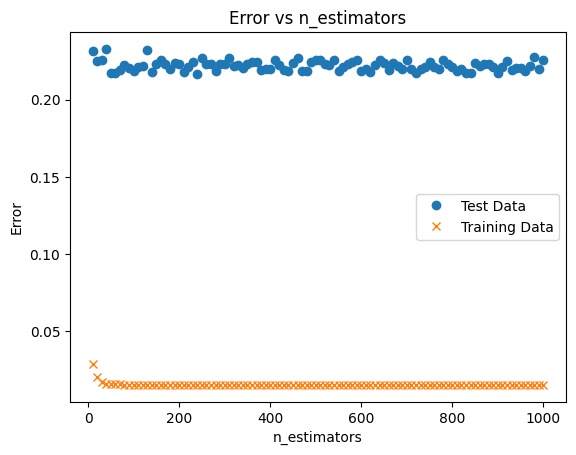

In [54]:
n_estimators_range = range(10, 1001, 10)
tuples = test_n_estimators(x_train_array, y_train_array, n_estimators_range, warm_start=False)
plot_graph(tuples, yaxis='Error', xaxis='n_estimators', title='Error vs n_estimators')

(100, 0.21791665, 0.08324999)
(110, 0.21708333, 0.07591667)
(120, 0.21958333, 0.06966667)
(130, 0.21958335, 0.061833333)
(140, 0.21333332, 0.055083334)
(150, 0.21624999, 0.05)
(160, 0.21625, 0.044333328)
(170, 0.21499999, 0.038583335)
(180, 0.21499999, 0.032166664)
(190, 0.21541667, 0.028583333)
(200, 0.21708333, 0.02483333)
(210, 0.20916666, 0.021499999)
(220, 0.21833335, 0.018916667)
(230, 0.21625, 0.01775)
(240, 0.21833332, 0.016500002)
(250, 0.22208333, 0.016083334)
(260, 0.22125, 0.015916666)
(270, 0.22041667, 0.015666667)
(280, 0.22083335, 0.015666666)
(290, 0.22125, 0.015500001)
(300, 0.21833335, 0.015416667)
(310, 0.21916665, 0.015416667)
(320, 0.21750002, 0.015416667)
(330, 0.22416668, 0.015499999)
(340, 0.22000001, 0.015500001)
(350, 0.22208333, 0.015416667)
(360, 0.22291666, 0.015499999)
(370, 0.2275, 0.015416667)
(380, 0.22291668, 0.015416667)
(390, 0.22125, 0.015500001)
(400, 0.21708333, 0.015416667)
(410, 0.21875, 0.015416667)
(420, 0.22708334, 0.015416667)
(430, 0.224166

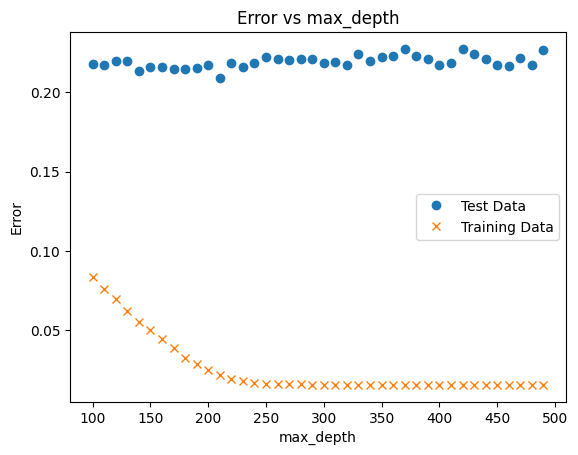

In [55]:
tuples = test_max_depth(x_train_array, y_train_array, max_depth_range)
plot_graph(tuples, yaxis='Error', xaxis='max_depth', title='Error vs max_depth')

In [56]:
# tuples = test_min_samples_split(x_train_array, y_train_array, min_samples_split_range)
# plot_graph(tuples, yaxis='Error', xaxis='min_samples_split', title='Error vs min_samples_split')

In [57]:
# tuples = test_min_samples_leaf(x_train_array, y_train_array, min_samples_leaf_range)
# plot_graph(tuples, yaxis='Error', xaxis='min_samples_leaf', title='Error vs min_samples_leaf')